 #                                         Speech-To-Text

In [2]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imutils import paths
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tqdm import tqdm
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt

%matplotlib inline

### Spectrogram

#### In below blog they tried with sample of wave file 
        https://www.analyticsvidhya.com/blog/2019/07/learn-build-first-speech-to-text-model-python/

#### Lets try with other feature like spectrogram
        Data : https://www.kaggle.com/c/tensorflow-speech-recognition-challenge

In [3]:
audios_dir = r'C:\Users\Tuf F15\Desktop\DATASET\train\audio'

In [4]:
words=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

In [5]:
import os
import sys
import wave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import subprocess
from shutil import copy2 as cp

In [6]:
def get_wav_info(wavname):
    wav = wave.open(wavname, 'r')
    frames = wav.readframes(-1)
    sound_info = np.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

In [7]:
get_wav_info(r"C:\Users\Tuf F15\Desktop\DATASET\train\audio/yes/00f0204f_nohash_0.wav")

<ipython-input-6-b77a2799404e>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = np.fromstring(frames, 'int16')


(array([14, 23, 19, ..., 19, 22, 24], dtype=int16), 16000)

In [8]:
def graph_spectrogram(wavname):
    sound_info, frame_rate = get_wav_info(wavname)
    plt.rcParams['axes.facecolor'] = 'black'
    plt.rcParams['savefig.facecolor'] = 'black'
    plt.rcParams['axes.edgecolor'] = 'white'
    plt.rcParams['lines.color'] = 'white'
    plt.rcParams['text.color'] = 'white'    
    plt.rcParams['xtick.color'] = 'white'    
    plt.rcParams['ytick.color'] = 'white'
    plt.rcParams['axes.labelcolor'] = 'white'
    fig = plt.figure(num=None, figsize=(12, 7.5), dpi=90)
    ax = fig.add_subplot(111)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(500))
    ax.tick_params(axis='both', direction='inout')
    plt.title('Spectrogram')
    plt.xlabel('time in seconds')
    plt.ylabel('Frequency (Khz)')
    plt.specgram(sound_info, Fs=frame_rate, cmap='gnuplot')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('dB')
    

<ipython-input-6-b77a2799404e>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = np.fromstring(frames, 'int16')


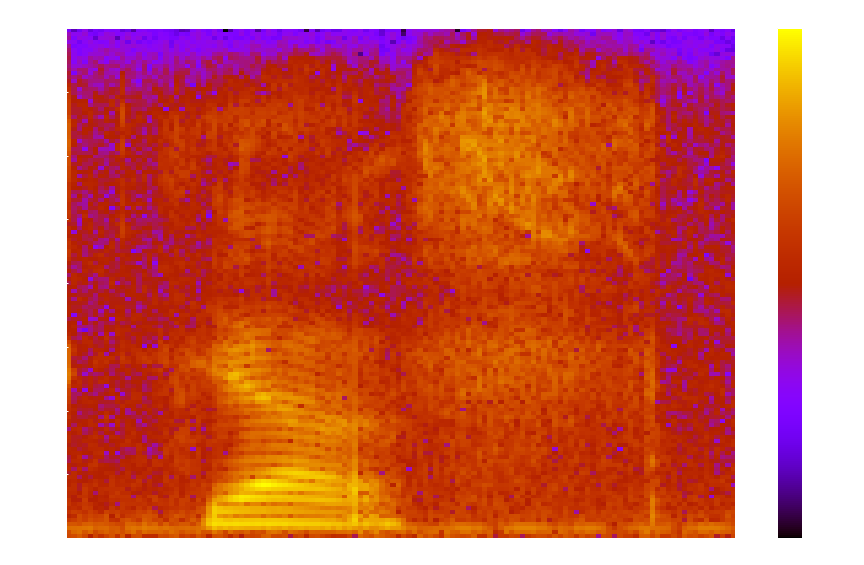

In [9]:
graph_spectrogram(r"C:\Users\Tuf F15\Desktop\DATASET\train\audio/yes/00f0204f_nohash_0.wav")

<ipython-input-10-335fa980a1ff>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, frequencies, spectrogram)


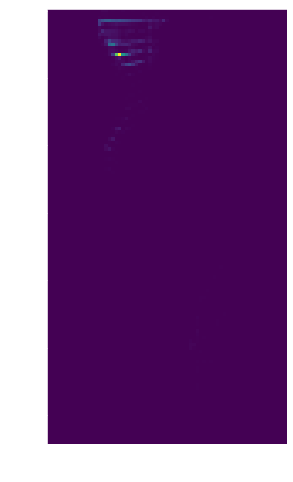

In [10]:
sample_rate, samples = wavfile.read(r'C:\Users\Tuf F15\Desktop\DATASET\train\audio/yes/00f0204f_nohash_0.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.figure(figsize=(30,8))
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [11]:
samples

array([14, 23, 19, ..., 19, 22, 24], dtype=int16)

<ipython-input-12-aee4b22a3610>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, frequencies, spectrogram)


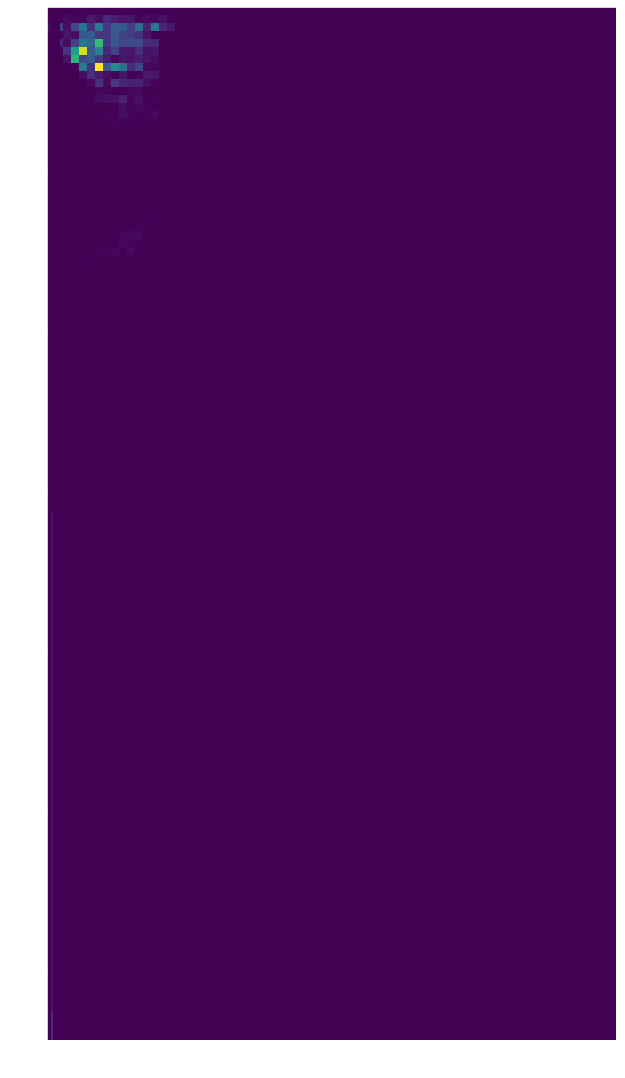

In [12]:
sample_rate, samples = wavfile.read(r'C:\Users\Tuf F15\Desktop\DATASET\train\audio/yes/c1e0e8e3_nohash_2.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.figure(figsize=(30,19))
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [13]:
times


array([0.008, 0.022, 0.036, 0.05 , 0.064, 0.078, 0.092, 0.106, 0.12 ,
       0.134, 0.148, 0.162, 0.176, 0.19 , 0.204, 0.218, 0.232, 0.246,
       0.26 , 0.274, 0.288, 0.302, 0.316, 0.33 , 0.344, 0.358, 0.372,
       0.386, 0.4  , 0.414, 0.428, 0.442, 0.456, 0.47 , 0.484, 0.498,
       0.512, 0.526, 0.54 , 0.554, 0.568, 0.582, 0.596, 0.61 , 0.624,
       0.638, 0.652, 0.666, 0.68 , 0.694, 0.708, 0.722, 0.736, 0.75 ,
       0.764, 0.778, 0.792, 0.806, 0.82 , 0.834, 0.848, 0.862, 0.876,
       0.89 , 0.904, 0.918, 0.932, 0.946, 0.96 , 0.974, 0.988])

In [14]:
frequencies

array([   0. ,   62.5,  125. ,  187.5,  250. ,  312.5,  375. ,  437.5,
        500. ,  562.5,  625. ,  687.5,  750. ,  812.5,  875. ,  937.5,
       1000. , 1062.5, 1125. , 1187.5, 1250. , 1312.5, 1375. , 1437.5,
       1500. , 1562.5, 1625. , 1687.5, 1750. , 1812.5, 1875. , 1937.5,
       2000. , 2062.5, 2125. , 2187.5, 2250. , 2312.5, 2375. , 2437.5,
       2500. , 2562.5, 2625. , 2687.5, 2750. , 2812.5, 2875. , 2937.5,
       3000. , 3062.5, 3125. , 3187.5, 3250. , 3312.5, 3375. , 3437.5,
       3500. , 3562.5, 3625. , 3687.5, 3750. , 3812.5, 3875. , 3937.5,
       4000. , 4062.5, 4125. , 4187.5, 4250. , 4312.5, 4375. , 4437.5,
       4500. , 4562.5, 4625. , 4687.5, 4750. , 4812.5, 4875. , 4937.5,
       5000. , 5062.5, 5125. , 5187.5, 5250. , 5312.5, 5375. , 5437.5,
       5500. , 5562.5, 5625. , 5687.5, 5750. , 5812.5, 5875. , 5937.5,
       6000. , 6062.5, 6125. , 6187.5, 6250. , 6312.5, 6375. , 6437.5,
       6500. , 6562.5, 6625. , 6687.5, 6750. , 6812.5, 6875. , 6937.5,
      

In [15]:
spectrogram

array([[3.00019264e+00, 2.95396179e+02, 5.75027344e+02, ...,
        1.79564282e-02, 1.45896345e-01, 1.08136326e-01],
       [1.98152087e+03, 1.29215466e+03, 3.45545435e+03, ...,
        2.68431716e-02, 8.66682976e-02, 8.95222574e-02],
       [4.03468701e+03, 2.29850859e+04, 4.63264746e+03, ...,
        1.47732571e-01, 1.38542557e+00, 2.04377007e+00],
       ...,
       [2.17786214e-06, 7.21325159e-06, 9.72227735e-06, ...,
        6.62526872e-05, 3.59796650e-05, 3.57009048e-05],
       [2.56235626e-06, 4.23171005e-05, 9.75406783e-06, ...,
        3.12677876e-04, 1.18152806e-04, 2.74950253e-05],
       [1.65188965e-06, 3.33031221e-06, 1.68632978e-05, ...,
        4.31949911e-06, 1.89926450e-05, 2.40293417e-07]], dtype=float32)

### Load Audio Data

In [16]:
data = []
labels = []
dirs = os.listdir(audios_dir)
for d in dirs:
    if d in words:
        print(d)
        files = os.listdir(os.path.join(audios_dir,d))
        audios = [f for f in files if f.endswith('.wav')]
        for file in audios:
            # load the image, swap color channels, and resize it to be a fixed
            # 224x224 pixels while ignoring aspect ratio
            #file = audios[i]
            sample_rate, samples = wavfile.read(os.path.join(audios_dir,d,file))
            frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

            # convert the image data to NumPy arrays while scaling the pixel
            # intensities to the range [0, 255]
            #image = np.array(image)/255.0
            
            # update the data and labels lists, respectively
            if spectrogram.shape[0] >= 128 and spectrogram.shape[1] >=48:
                data.append(spectrogram[:128,:48])
                labels.append(d)  # d est nom du dossier
            #else:
             #   print(spectrogram.shape)


down
go
left
no
off
on
right
stop
up
yes


In [17]:
data[0]

array([[3.4946587e-04, 2.1851694e-04, 8.2882143e-05, ..., 2.6568970e+01,
        2.8603546e+02, 2.3799536e+02],
       [2.4631266e-02, 9.7784307e-03, 1.1609027e-02, ..., 5.7106433e+02,
        1.2906905e+02, 7.2216943e+02],
       [3.2373827e-02, 3.5254853e-03, 7.3761251e-03, ..., 3.4563008e+04,
        3.6066930e+04, 1.7653605e+04],
       ...,
       [1.6769261e-05, 1.5220660e-05, 3.0395244e-05, ..., 2.6749960e-05,
        2.3588993e-05, 1.2733555e-06],
       [2.3327733e-05, 2.6257073e-06, 1.3387314e-05, ..., 7.7658715e-06,
        6.7493573e-07, 6.1118672e-06],
       [2.2200644e-05, 1.9091246e-06, 5.3932908e-06, ..., 2.2679484e-05,
        1.1653567e-05, 3.8602493e-06]], dtype=float32)

In [18]:
audios_dir = r'C:\Users\Tuf F15\Desktop\DATASET\train\audio'
words=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]
label_annot = []
dirs = os.listdir(audios_dir)
for d in dirs:
    if d in words:
        print(d)
        label_annot.append(d)

down
go
left
no
off
on
right
stop
up
yes


In [19]:
label_annot

['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

In [20]:
data = np.array(data)

In [21]:
data.shape

(23455, 128, 48)

### Class distribution

In [22]:
values,count = np.unique(labels,return_counts=True)

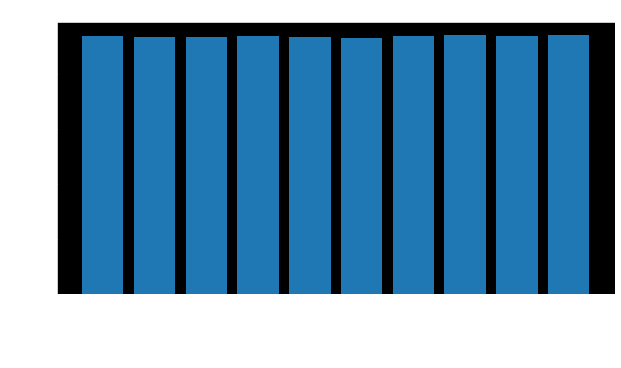

In [23]:
import matplotlib.pyplot as plt
#plot
plt.figure(figsize=(10,5))
index = np.arange(len(words))
plt.bar(index, count)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of samples', fontsize=12)
plt.xticks(index, words, fontsize=15, rotation=60)
plt.title('No. of samples for each command')
plt.show()

In [24]:
len(labels)

23455

In [25]:
labels_backup = labels

In [26]:
# convert the labels to NumPy arrays while scaling the pixel
labels = np.array(labels)

In [27]:
# perform one-hot encoding on the labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ls = le.fit_transform(labels)

In [28]:
labels_categoricals = to_categorical(ls)

In [29]:
labels_categoricals

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [30]:
labels_categoricals.shape

(23455, 10)

### Data splitting - Train,CV and Test 

In [31]:
# partition the data into training,cross-validation and testing splits using 60%,20% and 20% of data
(trainX, testX, trainY, testY) = train_test_split(data, labels_categoricals,test_size=0.20, stratify=labels_categoricals, random_state=42)
(trainX, cvX, trainY, cvY) = train_test_split(trainX, trainY,test_size=0.25, stratify=trainY, random_state=42)

In [32]:
print("Train data size : ",trainX.shape)
print("Cross-Validation data size : ",cvX.shape)
print("Test data size : ",testX.shape)

Train data size :  (14073, 128, 48)
Cross-Validation data size :  (4691, 128, 48)
Test data size :  (4691, 128, 48)


In [33]:
trainX.shape
testX.shape

(4691, 128, 48)

In [34]:
testY.shape

(4691, 10)

In [35]:
from keras import backend as K

# input image dimensions
img_rows, img_cols = 128, 48

if K.image_data_format() == 'channels_first':
    trainX = trainX.reshape(trainX.shape[0], 1, img_rows, img_cols)
    testX = testX.reshape(testX.shape[0], 1, img_rows, img_cols)
    cvX = cvX.reshape(cvX.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    trainX = trainX.reshape(trainX.shape[0],img_rows, img_cols,1)
    testX = testX.reshape(testX.shape[0],img_rows, img_cols,1)
    cvX = cvX.reshape(cvX.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)

In [36]:
trainX.shape
testX.shape

(4691, 128, 48, 1)

In [37]:
print("Number of training examples :", trainX.shape[0], "and each image is of shape :",trainX.shape)
print("Number of cross validation examples :", cvX.shape[0], "and each image is of shape :",cvX.shape)
print("Number of testing examples :", testX.shape[0], "and each image is of shape :",testX.shape)

Number of training examples : 14073 and each image is of shape : (14073, 128, 48, 1)
Number of cross validation examples : 4691 and each image is of shape : (4691, 128, 48, 1)
Number of testing examples : 4691 and each image is of shape : (4691, 128, 48, 1)


### VGG16 Model

In [38]:
!pip install nvidia-ml-py3 

In [39]:
import tensorflow as tf

In [40]:

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
else:
  print("No GPU device found")

In [41]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [42]:

#initialize the initial learning rate, number of epochs to train for and batch size
INIT_LR = 1e-3
EPOCHS = 150
batch_size = 32
num_class = 10
#input_shape = (224,224,3) #(513, 800, 3)

In [41]:
!nvidia-smi

Thu Aug 11 15:42:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.94       Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   59C    P0    31W /  N/A |      0MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [42]:
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.layers import Dropout,Flatten
from tensorflow.keras.layers import (BatchNormalization)

from keras.layers import Conv2D, MaxPooling2D

In [43]:
teacher = Sequential()
teacher.add(Conv2D(8, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))
teacher.add(Conv2D(16, kernel_size=(2, 2),padding='same',activation='relu'))
teacher.add(MaxPooling2D(pool_size=(2, 2)))
teacher.add(BatchNormalization())
teacher.add(Dropout(0.5))
teacher.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu'))
teacher.add(Conv2D(64, kernel_size=(2, 2),padding='same',activation='relu'))
teacher.add(MaxPooling2D(pool_size=(2, 2)))
teacher.add(BatchNormalization())
teacher.add(Dropout(0.5))
teacher.add(Conv2D(128, kernel_size=(2, 2),padding='same',activation='relu'))
teacher.add(Conv2D(256, kernel_size=(2, 2),padding='same',activation='relu'))
teacher.add(MaxPooling2D(pool_size=(2, 2)))
teacher.add(BatchNormalization())
teacher.add(Dropout(0.5))
teacher.add(Conv2D(512, kernel_size=(2, 2),padding='same',activation='relu'))
teacher.add(Conv2D(512, kernel_size=(2, 2),padding='same',activation='relu'))
teacher.add(MaxPooling2D(pool_size=(2, 2)))
teacher.add(BatchNormalization())
teacher.add(Dropout(0.5))
teacher.add(Flatten())
teacher.add(Dense(512, activation='relu'))
teacher.add(Dropout(0.5))
teacher.add(Dense(num_class, activation='softmax'))

teacher.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 48, 8)        40        
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 48, 16)       528       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 24, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 24, 16)       64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64, 24, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 24, 32)        2

In [44]:
student = Sequential(name="student")
student.add(Conv2D(8, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))
student.add(Conv2D(16, kernel_size=(2, 2),padding='same',activation='relu'))
student.add(MaxPooling2D(pool_size=(2, 2)))
student.add(BatchNormalization())
student.add(Dropout(0.5))
student.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))
student.add(Conv2D(64, kernel_size=(2, 2),padding='same',activation='relu'))
student.add(MaxPooling2D(pool_size=(2, 2)))
student.add(BatchNormalization())
student.add(Dropout(0.5))
student.add(Flatten())
student.add(Dense(64, activation='relu'))
student.add(Dropout(0.5))
student.add(Dense(num_class, activation='softmax'))

student.summary()

Model: "student"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 48, 8)        40        
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 48, 16)       528       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 24, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 64, 24, 16)       64        
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 64, 24, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 24, 32)        2080

In [45]:
from tensorflow import keras

In [46]:
student_scratch = keras.models.clone_model(student)

In [47]:
#from tensorflow.keras.optimizers import Adam
#opt = Adam(lr=INIT_LR)
teacher.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [49]:
#history = teacher.fit(trainX, trainY, batch_size=batch_size, epochs=EPOCHS, verbose=1, callbacks=[es,mc],validation_data=(cvX, cvY))

In [50]:
#best_acc = max(history.history["val_accuracy"])

In [51]:
#best_acc * 100

In [52]:
!nvidia-smi

Thu Aug 11 15:42:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.94       Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   59C    P0    29W /  N/A |    354MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Distillate

In [71]:
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super(Distiller, self).__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """ Configure the distiller.

        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)

            # Compute scaled distillation loss from https://arxiv.org/abs/1503.02531
            # The magnitudes of the gradients produced by the soft targets scale
            # as 1/T^2, multiply them by T^2 when using both hard and soft targets.
            distillation_loss = (
                self.distillation_loss_fn(
                    tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                    tf.nn.softmax(student_predictions / self.temperature, axis=1),
                )
                * self.temperature**2
            )

            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results


In [72]:
from keras import backend as K
i = 0

In [73]:
class UnFreezeCallback(tf.keras.callbacks.Callback):
   
    def on_epoch_end(self, epoch, logs=None):
        self.model.alpha = i
        print('Alpha changed', self.model.alpha)
    
    def on_epoch_begin(self, epoch, logs=None):
        global i
        i = i + 1/150
        print("Counter Changed: ", i)
                

In [74]:
t = keras.models.load_model("C:/Users/Tuf F15/Desktop/DATASET/specMethod-VGG19")

In [75]:

distiller = Distiller(student=student, teacher=t)


In [76]:
distiller.compile(optimizer='adam', metrics=['accuracy'], student_loss_fn=keras.losses.CategoricalCrossentropy(from_logits=True), distillation_loss_fn=keras.losses.CategoricalCrossentropy(from_logits=True), alpha=0.1, temperature=40)

In [77]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')


In [78]:
  
history = distiller.fit(trainX, trainY, batch_size=batch_size, epochs=EPOCHS, verbose=1, callbacks=[es,mc],validation_data=(cvX, cvY))
#i = i + 1/150

Epoch 1/150
440/440 [==============================] - 6s 13ms/step - accuracy: 0.7693 - student_loss: 2.2865 - distillation_loss: 3684.1362 - val_accuracy: 0.7438 - val_student_loss: 2.2902
Epoch 2/150
440/440 [==============================] - 6s 13ms/step - accuracy: 0.7691 - student_loss: 2.2862 - distillation_loss: 3684.1362 - val_accuracy: 0.7267 - val_student_loss: 2.2904
Epoch 3/150
440/440 [==============================] - 5s 12ms/step - accuracy: 0.7713 - student_loss: 2.2861 - distillation_loss: 3684.1362 - val_accuracy: 0.7546 - val_student_loss: 2.2888
Epoch 4/150
440/440 [==============================] - 5s 12ms/step - accuracy: 0.7674 - student_loss: 2.2862 - distillation_loss: 3684.1362 - val_accuracy: 0.7502 - val_student_loss: 2.2904
Epoch 5/150
440/440 [==============================] - 6s 13ms/step - accuracy: 0.7661 - student_loss: 2.2861 - distillation_loss: 3684.1362 - val_accuracy: 0.7235 - val_student_loss: 2.2901
Epoch 6/150
440/440 [========================

In [79]:
best_acc = max(history.history["val_accuracy"])

In [80]:
best_acc*100

78.72521877288818

alpha = 0.1 / temperature = 70 ==> 69.75058913230896

alpha = 0.1 / temperature = 40 ==> 80.15348315238953

alpha = 0.1 / temperature = 25 ==> 75.03730654716492

alpha = 0.2 / temperature = 40 ==> 72.94819951057434

alpha = 0.2 / temperature = 1 ==> 78.32018733024597

In [63]:
distiller.evaluate(testX, testY)

147/147 [==============================] - 1s 4ms/step - accuracy: 0.7845 - student_loss: 0.7007


[0.7844809293746948, 1.0638347864151]

In [68]:
from keras.layers.core import Lambda

In [69]:
distiller.student.add(Lambda(lambda x: x / 40))

In [99]:
distiller.evaluate(testX, testY)

147/147 [==============================] - 1s 4ms/step - accuracy: 0.7278 - student_loss: 2.2869


[0.7277765870094299, 2.2853763103485107]

In [126]:
def sample(a, temperature=0.01):
  a = np.array(a)**(1/temperature)
  p_sum = a.sum()
  sample_temp = a/p_sum 
  return np.random.multinomial(1, sample_temp, 1)

In [182]:
sample([0.2 , 0.4 , 0.5])

array([[1, 0, 0]])

In [154]:
distiller.student.save("C:/Users/Tuf F15/Desktop/DATASET/distillertest")

INFO:tensorflow:Assets written to: C:/Users/Tuf F15/Desktop/DATASET/distillertest\assets


INFO:tensorflow:Assets written to: C:/Users/Tuf F15/Desktop/DATASET/distillertest\assets


In [44]:
import keras

In [47]:
model = keras.models.load_model("C:/Users/Tuf F15/Desktop/DATASET/distiller")


In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.evaluate(testX, testY)

147/147 [==============================] - 1s 4ms/step - loss: 0.6981 - accuracy: 0.7862


[0.6981332898139954, 0.7861863374710083]

In [104]:
from keras import backend as K

# input image dimensions
img_rows, img_cols = 128, 48

if K.image_data_format() == 'channels_first':
    trainX = trainX.reshape(trainX.shape[0], 1, img_rows, img_cols)
    testX = testX.reshape(testX.shape[0], 1, img_rows, img_cols)
    cvX = cvX.reshape(cvX.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    trainX = trainX.reshape(trainX.shape[0],img_rows, img_cols,1)
    testX = testX.reshape(testX.shape[0],img_rows, img_cols,1)
    cvX = cvX.reshape(cvX.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)

In [52]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [83]:
testX[0].shape

(128, 48, 1)

In [79]:
p = model.predict(testX[1].reshape(1,128,48,1))

1/1 [==============================] - 0s 25ms/step


In [86]:
p

array([[0.15366378, 0.16593076, 0.07101817, 0.1866415 , 0.08385991,
        0.08319368, 0.08761302, 0.02767781, 0.10718367, 0.03321772]],
      dtype=float32)

In [90]:
sample(p.tolist()[0])

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [127]:
TtestY = []
for t in testX:
    TtestY.append(sample(model.predict(t.reshape(1,128,48,1)).tolist()[0] )  )   

TtestY = np.array(TtestY)

1/1 [==============================] - 0s 26ms/step


In [128]:
from sklearn.metrics import accuracy_score

In [129]:
a = [test[0].tolist() for test in TtestY]

In [130]:
a = np.array(a)

In [131]:
a

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [125]:
accuracy_score(testY, a)

0.7840545725858026

In [132]:
accuracy_score(testY, a)

0.7861863142187167

In [194]:
TtestY = TtestY.reshape(TtestY.shape[0],TtestY.shape[2])

In [191]:
a = [0,1,0,0,0,0,0,0,0,0]
TtestY[0] = a

In [195]:
model.evaluate(testX, TtestY)

147/147 [==============================] - 1s 3ms/step - loss: 0.6873 - accuracy: 0.7823


[0.6872709393501282, 0.782349169254303]

In [55]:
#from tensorflow.keras.optimizers import Adam
#opt = Adam(lr=INIT_LR)
student_scratch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [57]:
history = student_scratch.fit(trainX, trainY, batch_size=batch_size, epochs=EPOCHS, verbose=1, callbacks=[es,mc],validation_data=(cvX, cvY))

Epoch 1/150
440/440 [==============================] - 5s 10ms/step - loss: 2.4953 - accuracy: 0.1005 - val_loss: 2.3255 - val_accuracy: 0.1006
Epoch 2/150
440/440 [==============================] - 4s 10ms/step - loss: 2.3179 - accuracy: 0.0967 - val_loss: 2.3077 - val_accuracy: 0.1002
Epoch 3/150
440/440 [==============================] - 4s 10ms/step - loss: 2.3036 - accuracy: 0.0983 - val_loss: 2.2981 - val_accuracy: 0.1055
Epoch 4/150
440/440 [==============================] - 4s 10ms/step - loss: 2.2973 - accuracy: 0.1030 - val_loss: 2.2825 - val_accuracy: 0.1158
Epoch 5/150
440/440 [==============================] - 4s 10ms/step - loss: 2.2916 - accuracy: 0.1059 - val_loss: 3.7008 - val_accuracy: 0.1030
Epoch 6/150
440/440 [==============================] - 4s 9ms/step - loss: 2.2811 - accuracy: 0.1149 - val_loss: 3.6939 - val_accuracy: 0.1053
Epoch 7/150
440/440 [==============================] - 4s 9ms/step - loss: 2.2744 - accuracy: 0.1221 - val_loss: 2.5701 - val_accuracy: 0

In [69]:
best_acc = max(history.history["val_accuracy"])

In [70]:
best_acc*100

77.8085708618164

In [51]:
student_scratch.save("C:/Users/Tuf F15/Desktop/DATASET/specMethod-VGG7")

INFO:tensorflow:Assets written to: C:/Users/Tuf F15/Desktop/DATASET/specMethod-VGG7\assets


INFO:tensorflow:Assets written to: C:/Users/Tuf F15/Desktop/DATASET/specMethod-VGG7\assets


### Results of Quantiziation

Post training quantization

In [78]:
import tensorflow as tf
from tensorflow import keras

In [3]:
#Without quantization
converter = tf.lite.TFLiteConverter.from_saved_model("C:/Users/Tuf F15/Desktop/DATASET/specMethod-VGG19")
tflite_model = converter.convert()

In [4]:
len(tflite_model)

32200336

In [62]:
#With quantization
converter = tf.lite.TFLiteConverter.from_saved_model("C:/Users/Tuf F15/Desktop/DATASET/specMethod-VGG19")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [63]:
len(tflite_quant_model)

8088088

In [96]:
#With quantization/Distillation
converter = tf.lite.TFLiteConverter.from_saved_model("C:/Users/Tuf F15/Desktop/DATASET/distiller")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_distill_quant_model8 = converter.convert()

In [97]:
len(tflite_distill_quant_model8)

1595864

In [98]:
#With quantization/Distillation
converter = tf.lite.TFLiteConverter.from_saved_model("C:/Users/Tuf F15/Desktop/DATASET/distiller")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_distill_quant_model16 = converter.convert()

In [99]:
len(tflite_distill_quant_model16)

3176752

In [18]:
with open("C:/Users/Tuf F15/Desktop/DATASET/vgg19tf", "wb") as f:
    f.write(tflite_model)

In [6]:

with open("C:/Users/Tuf F15/Desktop/DATASET/vgg19_tf_quant.tflite", "wb") as f:
    f.write(tflite_quant_model)

In [100]:
with open("C:/Users/Tuf F15/Desktop/DATASET/vgg19_tf_distill_quant8.tflite", "wb") as f:
    f.write(tflite_distill_quant_model8)

In [101]:
with open("C:/Users/Tuf F15/Desktop/DATASET/vgg19_tf_distill_quant16.tflite", "wb") as f:
    f.write(tflite_distill_quant_model16)

In [73]:
interpreter = tf.lite.Interpreter(model_path= "C:/Users/Tuf F15/Desktop/DATASET/vgg19_tf_distill_quant.tflite")
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 128  48   1]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 10]
Output Type: <class 'numpy.float32'>


In [74]:
output = interpreter.tensor(interpreter.get_output_details()[0]["index"])

In [75]:
#conmpute metrics on ouput


<function tensorflow.lite.python.interpreter.Interpreter.tensor.<locals>.<lambda>()>

In [141]:
m = tf.keras.metrics.CategoricalCrossentropy()

In [9]:
from keras import backend as K

In [76]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\test\test\clip_00fe78fd9.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

dataS = []
dataS.append(spectrogram[:128,:48])

dataS = np.array(dataS)

# input image dimensions
img_rows, img_cols = 128, 48

if K.image_data_format() == 'channels_first':
    dataS = dataS.reshape(dataS.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    dataS = dataS.reshape(dataS.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)

In [77]:
print(interpreter.get_input_details())

[{'name': 'serving_default_conv2d_8_input:0', 'index': 0, 'shape': array([  1, 128,  48,   1]), 'shape_signature': array([ -1, 128,  48,   1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [78]:
dataS.dtype

dtype('float32')

In [79]:
interpreter.allocate_tensors()
interpreter.set_tensor(input_details[0]['index'], dataS)
interpreter.invoke()
pre = interpreter.get_tensor(output_details[0]['index'])

In [80]:
label_annot[np.argmax(pre[0])] 

'stop'

Quantization aware training

## Results of Distillation

Teacher: VGG19 ==> 87.23086714744568

Student: VGG7 ==> 77.29695439338684 

alpha = 0.1 (fixed)

T=1 ==> distilled : 83.88403058052063

T=2 ==> distilled : 82.60498642921448

T=3 ==> distilled : 79.36474084854126 

--------------------------------------

alpha = 0.2 (fixed)

T=1 ==> distilled : 84.20379161834717

T=2 ==> distilled : 84.22511219978333

T=3 ==> distilled : 84.28906202316284

--------------------------------------

alpha = 0.9 (fixed)

T=1 ==> distilled : 84.41696763038635

T=2 ==> distilled : 84.43828821182251

T=3 ==> distilled : 84.43828821182251

--------------------------------------

apha changing from 0 to 1

T=1 ==> distilled : 77.8085708618164

T=1 ==> distilled : 

T=1 ==> distilled : 

--------------------------------------

apha changing from 1 to 0

T=1 ==> distilled : 76.12449526786804

T=1 ==> distilled : 

T=1 ==> distilled : 

In [48]:
result = teacher.evaluate(testX, testY)

NameError: name 'testX' is not defined

In [ ]:
print("test loss, test acc:", result)

In [52]:
result = student_scratch.evaluate(testX, testY)

147/147 [==============================] - 0s 3ms/step - loss: 0.7167 - accuracy: 0.7723


In [53]:
print("test loss, test acc:", result)


test loss, test acc: [0.7166783809661865, 0.7723299860954285]


In [ ]:
result = distiller.evaluate(testX, testY)

In [ ]:
print("test loss, test acc:", result)

### TEST

In [41]:
audios_dir = r'C:\Users\Tuf F15\Desktop\DATASET\test\test'

dataT = []
labels = []
dirs = os.listdir(audios_dir)
for d in dirs:
    # load the image, swap color channels, and resize it to be a fixed
    # 224x224 pixels while ignoring aspect ratio
    #file = audios[i]
    sample_rate, samples = wavfile.read(os.path.join(audios_dir,d))
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

    # convert the image data to NumPy arrays while scaling the pixel
    # intensities to the range [0, 255]
    #image = np.array(image)/255.0
    
    # update the data and labels lists, respectively
    if spectrogram.shape[0] >= 128 and spectrogram.shape[1] >=48:
        dataT.append(spectrogram[:128,:48])
    #else:
        #   print(spectrogram.shape)

c:\Users\Tuf F15\anaconda3\lib\site-packages\scipy\signal\spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '


In [42]:
dataT = np.array(dataT)

In [9]:
from keras import backend as K

# input image dimensions
img_rows, img_cols = 128, 48

if K.image_data_format() == 'channels_first':
    dataT = dataT.reshape(dataT.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    dataT = dataT.reshape(dataT.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)

NameError: name 'dataT' is not defined

In [44]:
dataT.shape

(4690, 128, 48, 1)

In [45]:
pre=model.predict(dataT)

147/147 [==============================] - 2s 15ms/step


In [46]:
pre.shape

(4690, 10)

In [47]:
pre[0]

array([2.9752339e-04, 1.0840432e-03, 1.6671187e-03, 2.6360370e-04,
       4.9087014e-03, 1.0133242e-03, 8.7719999e-04, 1.4864685e-03,
       9.8769987e-01, 7.0213788e-04], dtype=float32)

In [48]:
np.argmax(pre[0])

8

In [10]:
audios_dir = r'C:\Users\Tuf F15\Desktop\DATASET\train\audio'
words=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]
label_annot = []
dirs = os.listdir(audios_dir)
for d in dirs:
    if d in words:
        print(d)
        label_annot.append(d)

down
go
left
no
off
on
right
stop
up
yes


In [25]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\test\test\clip_00fe78fd9.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

dataS = []
dataS.append(spectrogram[:128,:48])

dataS = np.array(dataS)

# input image dimensions
img_rows, img_cols = 128, 48

if K.image_data_format() == 'channels_first':
    dataS = dataS.reshape(dataS.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    dataS = dataS.reshape(dataS.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)


NameError: name 'wavfile' is not defined

In [51]:
dataS.shape

(1, 128, 48, 1)

In [52]:
pre=model.predict(dataS)

1/1 [==============================] - 0s 259ms/step


In [64]:
pre

array([[1.7910957e-17, 4.8115008e-18, 1.1369165e-13, 1.6296801e-16,
        4.3783729e-22, 6.2547245e-35, 5.8429344e-28, 2.8162092e-17,
        1.1591052e-29, 1.0000000e+00]], dtype=float32)

In [53]:
label_annot[np.argmax(pre[0])] 

'stop'

In [58]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\test\test\clip_0a42cce82.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

dataS = []
dataS.append(spectrogram[:128,:48])

dataS = np.array(dataS)



In [60]:
frequencies

array([   0. ,   62.5,  125. ,  187.5,  250. ,  312.5,  375. ,  437.5,
        500. ,  562.5,  625. ,  687.5,  750. ,  812.5,  875. ,  937.5,
       1000. , 1062.5, 1125. , 1187.5, 1250. , 1312.5, 1375. , 1437.5,
       1500. , 1562.5, 1625. , 1687.5, 1750. , 1812.5, 1875. , 1937.5,
       2000. , 2062.5, 2125. , 2187.5, 2250. , 2312.5, 2375. , 2437.5,
       2500. , 2562.5, 2625. , 2687.5, 2750. , 2812.5, 2875. , 2937.5,
       3000. , 3062.5, 3125. , 3187.5, 3250. , 3312.5, 3375. , 3437.5,
       3500. , 3562.5, 3625. , 3687.5, 3750. , 3812.5, 3875. , 3937.5,
       4000. , 4062.5, 4125. , 4187.5, 4250. , 4312.5, 4375. , 4437.5,
       4500. , 4562.5, 4625. , 4687.5, 4750. , 4812.5, 4875. , 4937.5,
       5000. , 5062.5, 5125. , 5187.5, 5250. , 5312.5, 5375. , 5437.5,
       5500. , 5562.5, 5625. , 5687.5, 5750. , 5812.5, 5875. , 5937.5,
       6000. , 6062.5, 6125. , 6187.5, 6250. , 6312.5, 6375. , 6437.5,
       6500. , 6562.5, 6625. , 6687.5, 6750. , 6812.5, 6875. , 6937.5,
      

In [55]:
pre=model.predict(dataS)

1/1 [==============================] - 0s 57ms/step


In [65]:
pre

array([[1.7910957e-17, 4.8115008e-18, 1.1369165e-13, 1.6296801e-16,
        4.3783729e-22, 6.2547245e-35, 5.8429344e-28, 2.8162092e-17,
        1.1591052e-29, 1.0000000e+00]], dtype=float32)

In [56]:
label_annot[np.argmax(pre[0])] 

'down'

In [63]:
from keras import backend as K


In [61]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\output.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

dataS = []
dataS.append(spectrogram[:128,:48])

dataS = np.array(dataS)


c:\Users\Tuf F15\anaconda3\lib\site-packages\scipy\signal\spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '


In [72]:
samples


array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-6353, -6353],
       [-7274, -7274],
       [-7034, -7034]], dtype=int16)

(2,)

In [62]:
frequencies

array([   0., 8000.])

In [58]:
pre=model.predict(dataS)

1/1 [==============================] - 0s 57ms/step


In [66]:
pre

array([[1.7910957e-17, 4.8115008e-18, 1.1369165e-13, 1.6296801e-16,
        4.3783729e-22, 6.2547245e-35, 5.8429344e-28, 2.8162092e-17,
        1.1591052e-29, 1.0000000e+00]], dtype=float32)

In [59]:
label_annot[np.argmax(pre[0])] 

'yes'

In [119]:
import librosa

### Preprocessing Audio

In [59]:
from os import path
from pydub import AudioSegment, effects  
import os
import sys
import wave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import subprocess
import soundfile
from shutil import copy2 as cp


In [19]:
def get_wav_info(wavname):
    wav = wave.open(wavname, 'r')
    frames = wav.readframes(-1)
    sound_info = np.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

In [20]:
label_annot

['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

In [105]:
# files                                                                         
src = r"C:\Users\Tuf F15\Desktop\DATASET\test2.mp3"
dst = r"C:\Users\Tuf F15\Desktop\DATASET\b.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='C:\\Users\\Tuf F15\\Desktop\\DATASET\\b.wav'>

In [60]:
# files                                                                         
src = r"C:\Users\Tuf F15\Desktop\DATASET\test4.m4a"
dst = r"C:\Users\Tuf F15\Desktop\DATASET\b.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_file(src,  format= 'm4a')
sound.export(dst, format="wav")

<_io.BufferedRandom name='C:\\Users\\Tuf F15\\Desktop\\DATASET\\b.wav'>

In [61]:

sound = AudioSegment.from_wav(r"C:\Users\Tuf F15\Desktop\DATASET\b.wav")
sound = sound.set_channels(1)
sound = sound.set_frame_rate(16000)
sound.export(r"C:\Users\Tuf F15\Desktop\DATASET\output.wav", format="wav")


<_io.BufferedRandom name='C:\\Users\\Tuf F15\\Desktop\\DATASET\\output.wav'>

In [62]:
get_wav_info(r"C:\Users\Tuf F15\Desktop\DATASET\output.wav")

<ipython-input-6-b77a2799404e>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = np.fromstring(frames, 'int16')


(array([0, 0, 0, ..., 0, 0, 0], dtype=int16), 16000)

In [63]:
from keras import backend as K

#### [Without Quantization] TEST 4 audios test1 - test2 - test3 - test4

test1 ==> actual: left      |       predicted: left                    
test2 ==> actual: right      |      predicted: go                     
test3 ==> actual: down      |    predicted: on                        
test4 ==> actual: stop      |       predicted: stop   

#### [With Quantization] TEST 4 audios test1 - test2 - test3 - test4

test1 ==> actual: left      |       predicted: yes                    
test2 ==> actual: right      |      predicted: right                     
test3 ==> actual: down      |    predicted: on                        
test4 ==> actual: stop      |       predicted: stop 

#### [With Quantization && Distillation] TEST 4 audios test1 - test2 - test3 - test4

test1 ==> actual: left      |       predicted: yes                    
test2 ==> actual: right      |      predicted: right                     
test3 ==> actual: down      |    predicted: on                        
test4 ==> actual: stop      |       predicted: stop 

In [64]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\output.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

In [65]:
sample_rate

16000

In [50]:
graph_spectrogram(r"C:\Users\Tuf F15\Desktop\DATASET\output.wav")

NameError: name 'graph_spectrogram' is not defined

In [66]:
sample_rate, samples = wavfile.read(r"C:\Users\Tuf F15\Desktop\DATASET\output.wav")
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

dataS = []
dataS.append(spectrogram[:128,:48])

dataS = np.array(dataS)

# input image dimensions
img_rows, img_cols = 128, 48

if K.image_data_format() == 'channels_first':
    dataS = dataS.reshape(dataS.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    dataS = dataS.reshape(dataS.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)

In [67]:
dataS.shape

(1, 128, 48, 1)

In [70]:
pre=model.predict(dataS)

1/1 [==============================] - 0s 19ms/step


In [71]:
label_annot[np.argmax(pre[0])] 

'yes'

In [133]:
interpreter.allocate_tensors()
interpreter.set_tensor(input_details[0]['index'], dataS)
interpreter.invoke()
pre = interpreter.get_tensor(output_details[0]['index'])

In [134]:
label_annot[np.argmax(pre[0])] 

'on'